# Data Preparation und Cleaning

In [270]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots
import os
os.environ['OMP_NUM_THREADS'] = '2' #wird gebraucht um keine Warnung von Windows zu bekommen 
from sklearn.cluster import KMeans #wird benötigt fürs clustering
from sklearn.preprocessing import StandardScaler #wird benötigt fürs clustering

In [271]:
train_data = pd.read_csv('./mymoviedb.csv', engine='python') #Grunddatenset wird eingelesen

In [272]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [273]:
train_data.shape

(9837, 9)

In [274]:
#Datentypen für den gecleanten Datensatz werden festgelegt
column_types = {'Title':'string', 'Overview':'string', 'Original_Language':'string', 'Genre':'string'}
#Datensatz wird eingelesen und mit den oben definierten Datentypen typecasted
train_data_clean = pd.read_csv('./mymoviedb.csv', engine='python', dtype=column_types)

In [275]:
# null-Werte werden gedropped
train_data_clean = train_data_clean.dropna()
#Zahlenwerte werden typecasted
train_data_clean['Vote_Count'] = train_data_clean['Vote_Count'].astype(int)
train_data_clean['Popularity'] = train_data_clean['Popularity'].astype(int)
train_data_clean['Vote_Average'] = train_data_clean['Vote_Average'].astype(float)
#Datum wird in ein Datum type gecasted
train_data_clean['Release_Date'] = pd.to_datetime(train_data_clean['Release_Date'])

In [276]:
#
train_data_clean = train_data_clean.drop(columns=['Poster_Url','Overview'])

In [277]:
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   string        
 2   Popularity         9826 non-null   int32         
 3   Vote_Count         9826 non-null   int32         
 4   Vote_Average       9826 non-null   float64       
 5   Original_Language  9826 non-null   string        
 6   Genre              9826 non-null   string        
dtypes: datetime64[ns](1), float64(1), int32(2), string(3)
memory usage: 537.4 KB


In [278]:
train_data_clean.shape

(9826, 7)

In [279]:
print(train_data_clean.isnull().sum())

Release_Date         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64


In [280]:
train_data_clean.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618,122,6.3,en,Thriller
3,2021-11-24,Encanto,2402,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895,1793,7.0,en,"Action, Adventure, Thriller, War"


In [281]:
train_data_clean.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9826,9826.000000,9826.000000,9826.000000
mean,2006-09-23 04:47:14.276409600,39.828007,1392.943721,6.439467
min,1902-04-17 00:00:00,13.000000,0.000000,0.000000
25%,2000-10-17 12:00:00,16.000000,146.000000,5.900000
50%,2011-09-12 00:00:00,21.000000,444.000000,6.500000
75%,2017-11-22 00:00:00,35.000000,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.000000,31077.000000,10.000000
std,NaN,108.879786,2611.303856,1.129797


# Daten Visualisalisierung

## Genres aufgeteilt und Popularity addiert

In [282]:
genre_popularity = {}

# Durchlaufen jeder Zeile im Datensatz
for i, row in train_data_clean.iterrows():
    #'Genre' string nach jedem Komma aufteilen
    genres = row['Genre'].replace(" ", "").split(",")
    # popularity in int casten(wir runden)
    popularity = int(round(row["Popularity"]))
    
    # popularity der Filme mit dem gleichen Genre wird aufsummiert
    for genre in genres:
        if genre in genre_popularity:
            genre_popularity[genre] += popularity
        else:
            genre_popularity[genre] = popularity

# Sortiere: absteigend
sorted_genres = sorted(genre_popularity.items(), key=lambda x: x[1], reverse=True)

for genre, popularity in sorted_genres:
    print(f"{genre}: {popularity}")

Action: 135363
Comedy: 113299
Drama: 110739
Thriller: 105612
Adventure: 98687
Animation: 74686
Fantasy: 68794
Family: 65208
ScienceFiction: 62398
Horror: 55500
Crime: 54965
Romance: 44818
Mystery: 30603
History: 11914
War: 10724
Music: 9809
TVMovie: 6303
Documentary: 6177
Western: 4886


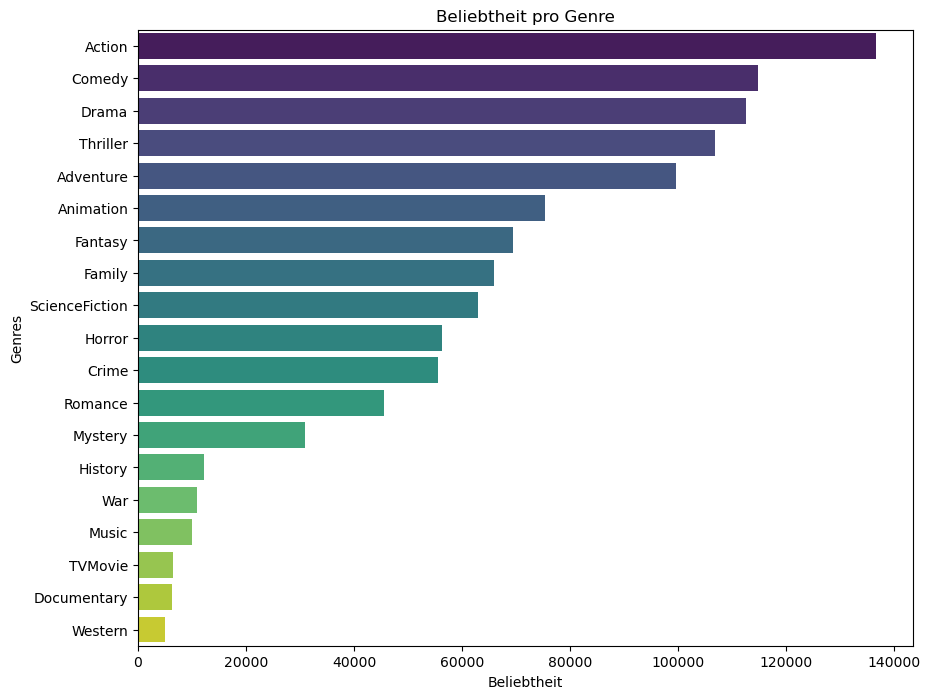

In [283]:
genre_popularity = {"Action": 136663, "Comedy": 114795, "Drama": 112622, "Thriller": 106822, 
                    "Adventure": 99560, "Animation": 75392, "Fantasy": 69425, "Family": 65918, 
                    "ScienceFiction": 63019, "Horror": 56248, "Crime": 55567, "Romance": 45583, 
                    "Mystery": 30995, "History": 12136, "War": 10871, "Music": 9968, 
                    "TVMovie": 6410, "Documentary": 6288, "Western": 4960}

genres = list(genre_popularity.keys())
popularity = list(genre_popularity.values())

# Bar-Chart
plt.figure(figsize=(10, 8))
sns.barplot(x=popularity, y=genres, palette='viridis')
plt.xlabel('Beliebtheit')
plt.ylabel('Genres')
plt.title('Beliebtheit pro Genre')
plt.show()

## Anzahl der Filme in den jeweiligen Genres

In [284]:
genre_counts = train_data_clean['Genre'].str.split(', ').explode().value_counts()

print(genre_counts)

Genre
Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1438
Family             1414
Fantasy            1308
Science Fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
TV Movie            214
Western             137
Name: count, dtype: int64


### Absolutwerte nicht wirklich aussagekräftig, da sich die Anzahl der vertretenen Genres stark unterscheidet

## Durchschnittliche Beliebtheit für jedes Genre

In [285]:
genre_popularity = {}
genre_counts = {}

for i, row in train_data_clean.iterrows():
    genres = row['Genre'].split(', ')
    
    for genre in genres:
        if genre in genre_popularity:
            genre_popularity[genre] += row['Popularity']
            genre_counts[genre] += 1
        else:
            genre_popularity[genre] = row['Popularity']
            genre_counts[genre] = 1

# durchschnittliche popularity für jedes Genre
average_popularity = {genre: genre_popularity[genre] / genre_counts[genre] for genre in genre_popularity}

# Sortieren nach absteigender Reihenfolge
sorted_genres = sorted(average_popularity.items(), key=lambda x: x[1], reverse=True)

for genre, popularity in sorted_genres:
    print(f"{genre}: {popularity}")

Adventure: 53.25796006475985
Fantasy: 52.59480122324159
Animation: 51.93741307371349
Action: 50.395755770662696
Science Fiction: 49.016496465043204
Family: 46.11598302687412
Crime: 44.25523349436393
Thriller: 42.448553054662376
Mystery: 39.589909443725745
Horror: 37.755102040816325
Comedy: 37.38007258330584
Western: 35.66423357664234
War: 34.81818181818182
Music: 33.25084745762712
Romance: 30.36449864498645
Drama: 29.577724358974358
TV Movie: 29.453271028037385
Documentary: 28.730232558139534
History: 27.901639344262296


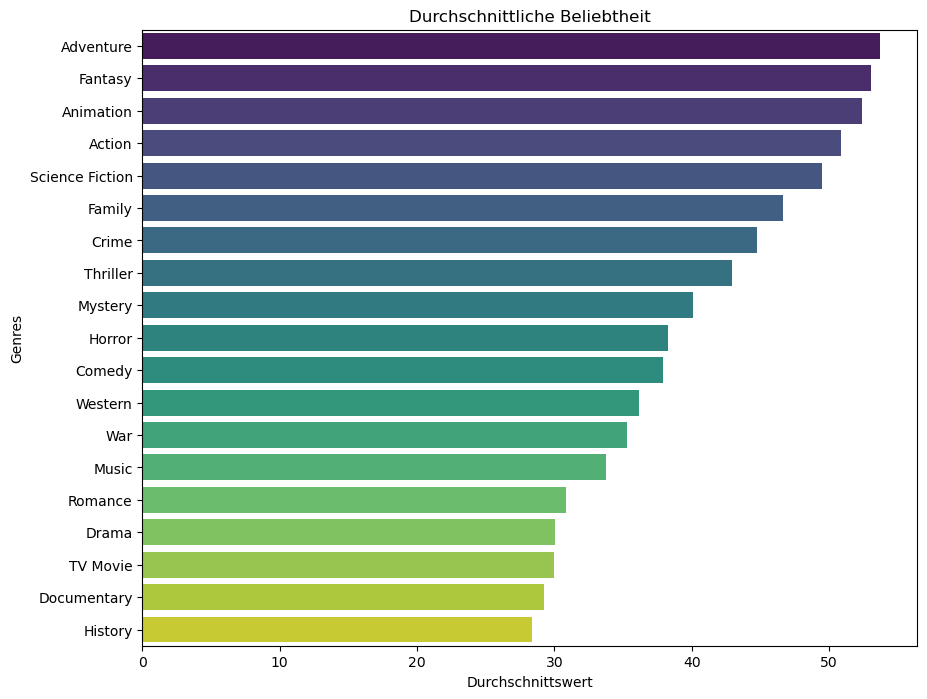

In [286]:
genres = ['Adventure', 'Fantasy', 'Animation', 'Action', 'Science Fiction', 'Family', 'Crime', 'Thriller', 'Mystery',
          'Horror', 'Comedy', 'Western', 'War', 'Music', 'Romance', 'Drama', 'TV Movie', 'Documentary', 'History']
values = [53.74288828926054, 53.08134174311917, 52.4276627260084, 50.890132911392364, 49.511333857030685, 46.6106159830269,
          44.74729549114323, 42.94625763665597, 40.09358990944373, 38.26449795918362, 37.87366875618602, 36.187912408759125,
          35.29807467532467, 33.77141016949153, 30.86603048780494, 30.077651442307708,
          29.954714953271036,29.235376744186063, 28.3958266978923]

# Bar-Chart
plt.figure(figsize=(10, 8))
sns.barplot(x=values, y=genres, palette='viridis')
plt.xlabel('Durchschnittswert')
plt.ylabel('Genres')
plt.title('Durchschnittliche Beliebtheit')
plt.show()

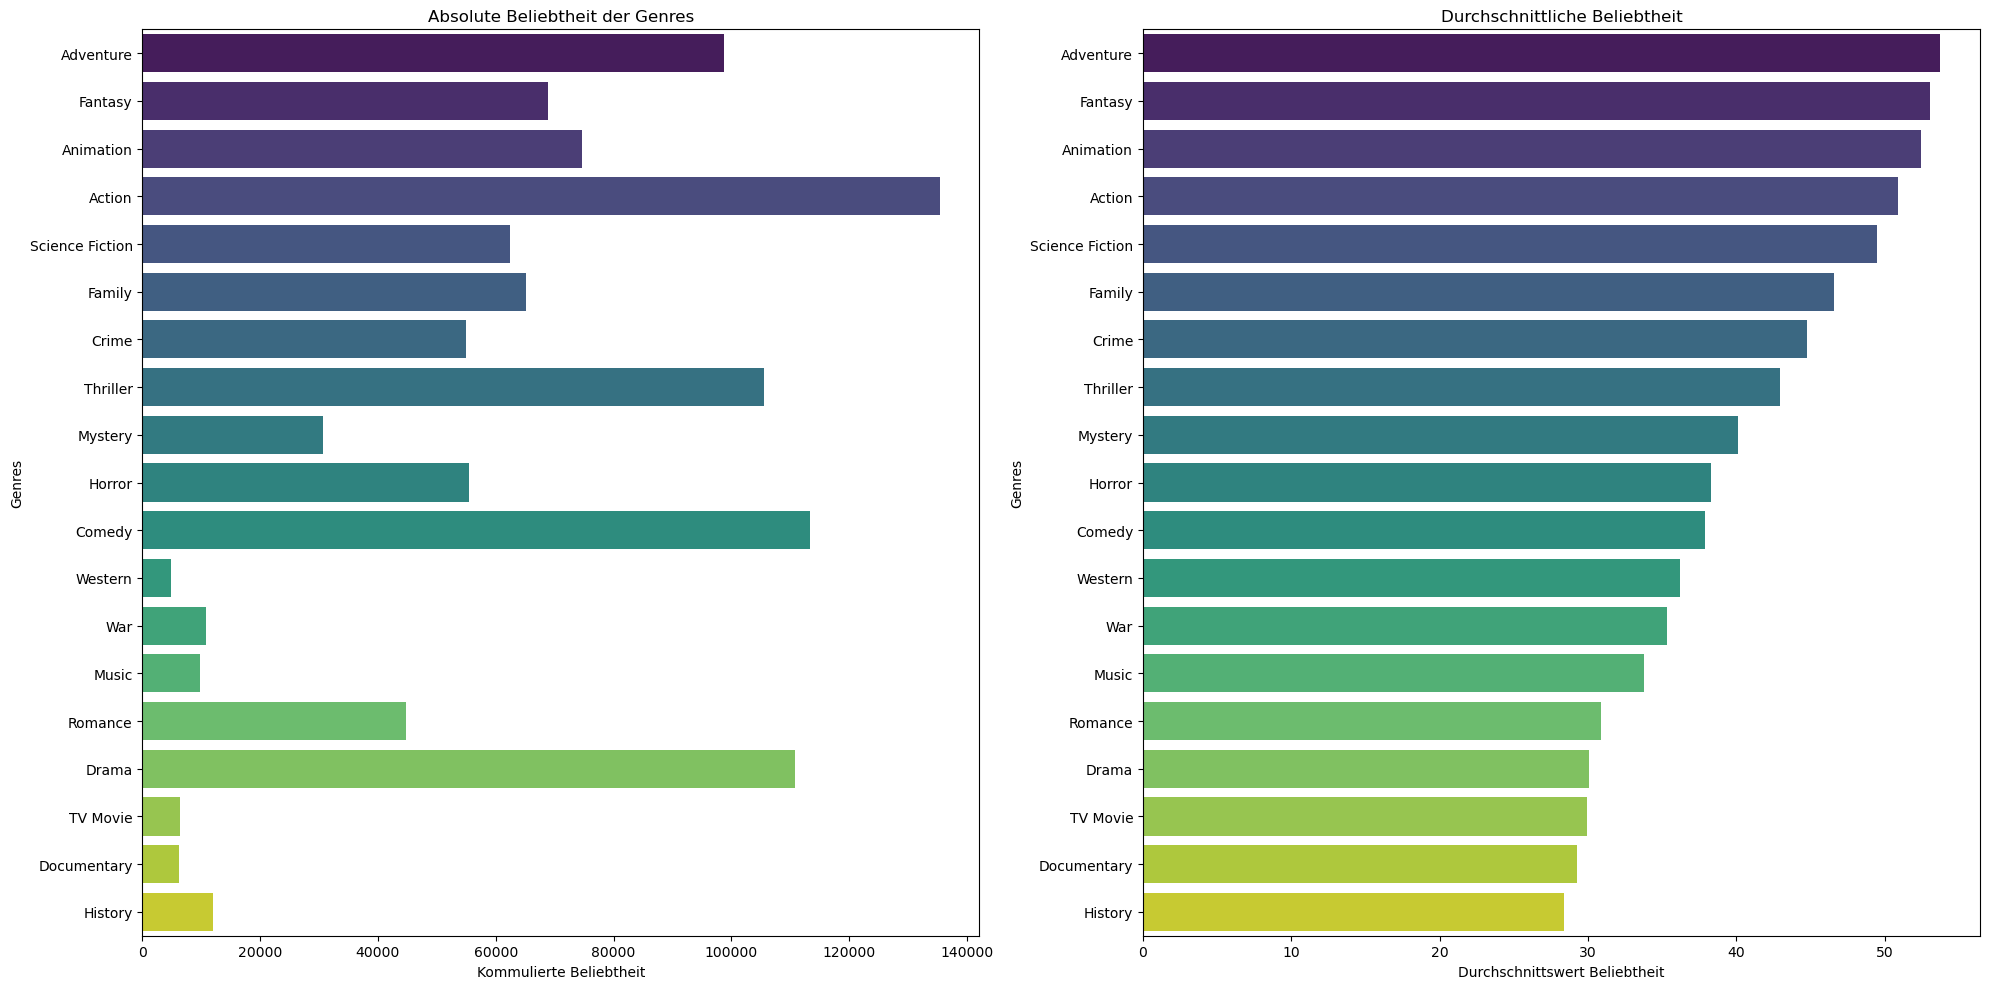

In [325]:
genre_popularity_sorted = {genre: genre_popularity[genre] for genre in genres}

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Erster Subplot
sns.barplot(x=list(genre_popularity_sorted.values()), y=list(genre_popularity_sorted.keys()), palette='viridis', ax=axs[0])
axs[0].set_xlabel('Kommulierte Beliebtheit')
axs[0].set_ylabel('Genres')
axs[0].set_title('Absolute Beliebtheit der Genres')

# Zweiter Subplot
sns.barplot(x=values, y=genres, palette='viridis', ax=axs[1])
axs[1].set_xlabel('Durchschnittswert Beliebtheit')
axs[1].set_ylabel('Genres')
axs[1].set_title('Durchschnittliche Beliebtheit')

# Anzeigen der Plots
plt.tight_layout()
plt.show()

#### Die Frage “Was schaut die Welt am liebsten?” bezieht sich auf das Genre, das die meisten Zuschauer oder die höchste Gesamtpopularität hat. Es geht darum, welches Genre insgesamt am meisten gesehen wird.

#### Die “durchschnittliche Beliebtheit” eines Genres bezieht sich auf die durchschnittliche Beliebtheit der Filme innerhalb dieses Genres. Es ist möglich, dass ein Genre nur wenige, aber sehr beliebte Filme hat und daher eine hohe durchschnittliche Beliebtheit hat. Es ist aber auch möglich, dass ein Genre viele Filme hat, die nicht so beliebt sind, und daher eine niedrigere durchschnittliche Beliebtheit hat, obwohl es insgesamt mehr gesehen wird.

## Median der Popularity

In [288]:
genre_popularity_medians = train_data_clean.assign(Genre=train_data_clean['Genre'].str.split(', ')).explode('Genre').groupby('Genre')['Popularity'].median()

print(genre_popularity_medians)

Genre
Action             24.0
Adventure          25.0
Animation          27.0
Comedy             20.0
Crime              19.0
Documentary        19.0
Drama              19.0
Family             24.0
Fantasy            25.5
History            19.0
Horror             21.0
Music              18.0
Mystery            20.0
Romance            19.0
Science Fiction    24.0
TV Movie           18.0
Thriller           21.0
War                19.0
Western            18.0
Name: Popularity, dtype: float64


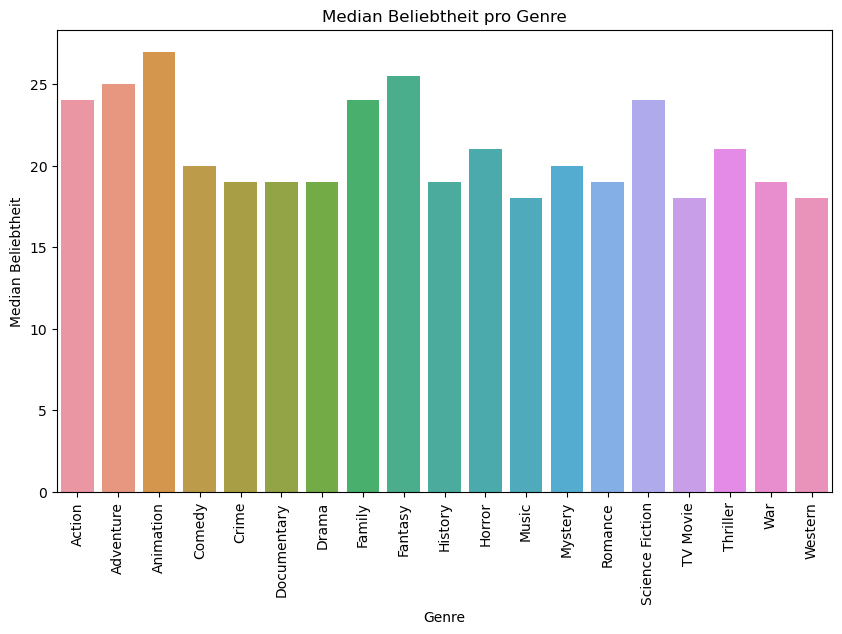

In [289]:
genre_popularity_medians = train_data_clean.assign(Genre=train_data_clean['Genre'].str.split(', ')).explode('Genre').groupby('Genre')['Popularity'].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_popularity_medians.index, y=genre_popularity_medians.values)
plt.xlabel('Genre')
plt.ylabel('Median Beliebtheit')
plt.title('Median Beliebtheit pro Genre')
plt.xticks(rotation=90)
plt.show()

## Correlation Matrix

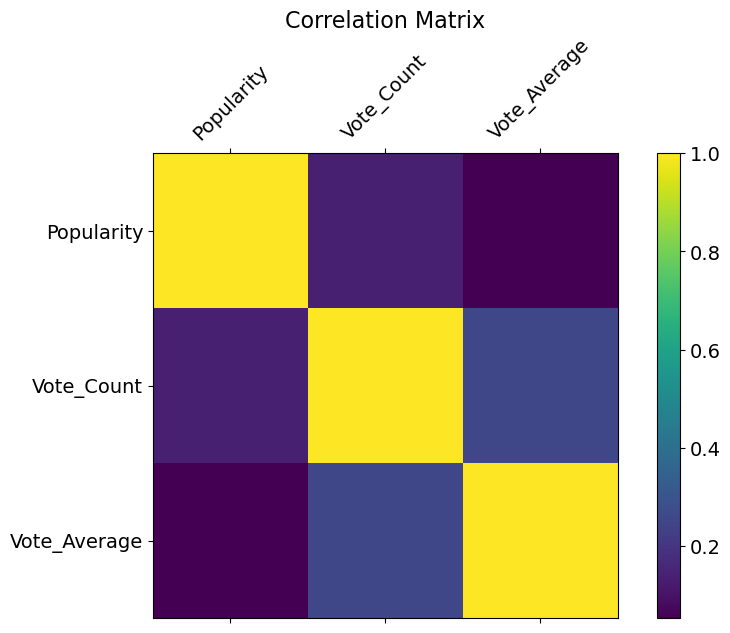

In [290]:
plt.figure(figsize=(10, 6))
numeric_data = train_data_clean.select_dtypes(include=['float64', 'int32'])
plt.matshow(numeric_data.corr(), fignum=plt.gcf().number)
plt.xticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=14, rotation=45)
plt.yticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

### Kein linearer Zusammenhang zwischen Popularity, Vote_Count und Vote_Average

## Beziehung zwischen Beliebtheit und Bewertung


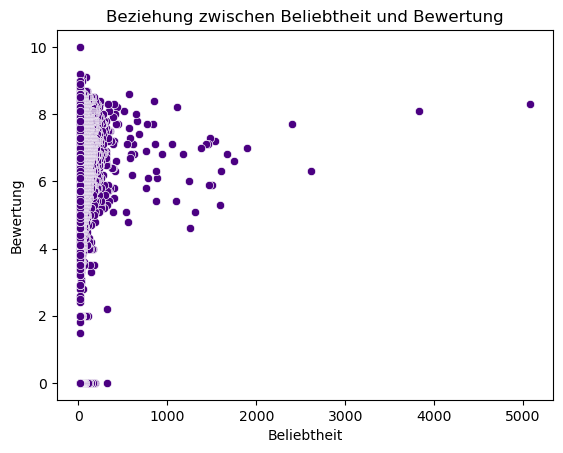

In [291]:
sns.scatterplot(x='Popularity', y='Vote_Average', data=train_data_clean, color='indigo')

plt.title('Beziehung zwischen Beliebtheit und Bewertung')
plt.xlabel('Beliebtheit')
plt.ylabel('Bewertung')

plt.show()

# Impementierung neuer Datensätze

## Netflix-Datensatz

In [292]:
netflix_data = pd.read_csv('./netflix_titles.csv', engine='python')

In [293]:
netflix_data.info()
netflix_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(8807, 12)

### Data Cleaning

In [294]:
column_types_netflix = {'title':'string','cast':'string','type':'string','listed_in':'string'}
data_netflix_clean = pd.read_csv('./netflix_titles.csv', engine='python', dtype=column_types_netflix)
data_netflix_clean = data_netflix_clean.drop(columns=['description', 'date_added', 'duration', 'country', 'show_id', 'director', 'rating'])
data_netflix_clean = data_netflix_clean.dropna()

In [295]:
data_netflix_clean.shape

(7982, 5)

In [296]:
print(data_netflix_clean.isnull().sum())

type            0
title           0
cast            0
release_year    0
listed_in       0
dtype: int64


In [297]:
data_netflix_clean['release_year'] = pd.to_datetime(data_netflix_clean['release_year'], format='%Y')
data_netflix_clean = data_netflix_clean[data_netflix_clean['type'] != 'TV Show']
data_netflix_clean.head()


,type,title,cast,release_year,listed_in
6,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-01-01,Children & Family Movies
7,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",1993-01-01,"Dramas, Independent Movies, International Movies"
9,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",2021-01-01,"Comedies, Dramas"
12,Movie,Je Suis Karl,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",2021-01-01,"Dramas, International Movies"
13,Movie,Confessions of an Invisible Girl,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",2021-01-01,"Children & Family Movies, Comedies"


### Mergen des Datensatzes mit dem ursprünglichen Movie Datensatz

In [298]:

netflix_common_titles = pd.merge(data_netflix_clean, train_data_clean, how='inner', left_on='title', right_on='Title')
netflix_common_titles = netflix_common_titles[['title', 'type', 'cast', 'release_year', 'listed_in', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre']]

## Disney-Datensatz

In [299]:
disney_data = pd.read_csv('./disney_plus_titles.csv', engine='python')
disney_data.info()
disney_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


(1450, 12)

### Data Cleaning

In [300]:
column_types_disney = {'title':'string', 'type':'string', 'cast':'string' , 'listed_in':'string'}
disney_data_clean = pd.read_csv('./disney_plus_titles.csv', engine='python', dtype=column_types_disney)
disney_data_clean = disney_data_clean.drop(columns=['show_id', 'director', 'country', 'duration', 'description', 'date_added' , 'rating'])
disney_data_clean = disney_data_clean.dropna()

In [301]:
disney_data_clean.shape

(1260, 5)

In [302]:
print(disney_data_clean.isnull().sum())

type            0
title           0
cast            0
release_year    0
listed_in       0
dtype: int64


In [303]:
disney_data_clean['release_year'] = pd.to_datetime(disney_data_clean['release_year'], format = '%Y')
disney_data_clean = disney_data_clean[disney_data_clean['type'] != 'TV Show']
disney_data_clean.head()

,type,title,cast,release_year,listed_in
0,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Chris Diamantopoulos, Tony Anselmo, Tress MacN...",2016-01-01,"Animation, Family"
1,Movie,Ernest Saves Christmas,"Jim Varney, Noelle Parker, Douglas Seale",1988-01-01,Comedy
2,Movie,Ice Age: A Mammoth Christmas,"Raymond Albert Romano, John Leguizamo, Denis L...",2011-01-01,"Animation, Comedy, Family"
3,Movie,The Queen Family Singalong,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",2021-01-01,Musical
5,Movie,Becoming Cousteau,"Jacques Yves Cousteau, Vincent Cassel",2021-01-01,"Biographical, Documentary"


### Mergen des Datensatzes mit dem ursprünglichen Movie Datensatz

In [304]:
disney_common_titles = pd.merge(disney_data_clean, train_data_clean, how='inner', left_on='title', right_on='Title')
disney_common_titles = disney_common_titles[['title', 'type', 'cast', 'release_year', 'listed_in', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre']]

## Amazon Prime Datensatz

In [305]:
amazon_data = pd.read_csv('./amazon_prime_titles.csv', engine='python')
amazon_data.info()
amazon_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


(9668, 12)

### Data Cleaning

In [306]:
column_types_amazon = {'title':'string', 'type':'string', 'cast':'string' , 'listed_in':'string'}

amazon_data_clean = pd.read_csv('./amazon_prime_titles.csv', engine='python', dtype=column_types_amazon)
amazon_data_clean = amazon_data_clean.drop(columns=['show_id', 'director', 'country', 'duration', 'description', 'date_added' , 'rating'])
amazon_data_clean = amazon_data_clean.dropna()

In [307]:
amazon_data_clean.shape

(8435, 5)

In [308]:
print(amazon_data_clean.isnull().sum())

type            0
title           0
cast            0
release_year    0
listed_in       0
dtype: int64


In [309]:
amazon_data_clean['release_year'] = pd.to_datetime(amazon_data_clean['release_year'], format = '%Y')
amazon_data_clean = amazon_data_clean[amazon_data_clean['type'] != 'TV Show']
amazon_data_clean.head()

,type,title,cast,release_year,listed_in
0,Movie,The Grand Seduction,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014-01-01,"Comedy, Drama"
1,Movie,Take Care Good Night,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018-01-01,"Drama, International"
2,Movie,Secrets of Deception,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017-01-01,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014-01-01,Documentary
4,Movie,Monster Maker,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989-01-01,"Drama, Fantasy"


### Mergen des Datensatzes mit dem ursprünglichen Movie Datensatz

In [310]:
amazon_common_titles = pd.merge(amazon_data_clean, train_data_clean, how='inner', left_on='title', right_on='Title')
amazon_common_titles = amazon_common_titles[['title', 'type', 'cast', 'release_year', 'listed_in', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre']]

# Clustering

In [311]:
def scale_clustering(data, feature):
    # Select the feature for scaling
    data_for_scaling = data[[feature]]

    # Use StandardScaler to scale the feature
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_scaling)

    return scaled_data

In [312]:
def elbow_function(data, feature):
    wcss = []  # Within-Cluster-Sum-of-Squares
    scaled_data = scale_clustering(data, feature)

    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(scaled_data)
        wcss.append(kmeans.inertia_)

    # Plot the Elbow Method
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Methode')
    plt.xlabel('Anzahl der Cluster')
    plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
    plt.show()

In [313]:
def clustering(data,optimal_clusters):
    kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    data['Cluster'] = kmeans.fit_predict(scale_clustering(data,'Popularity'))

## Elbow Funktion

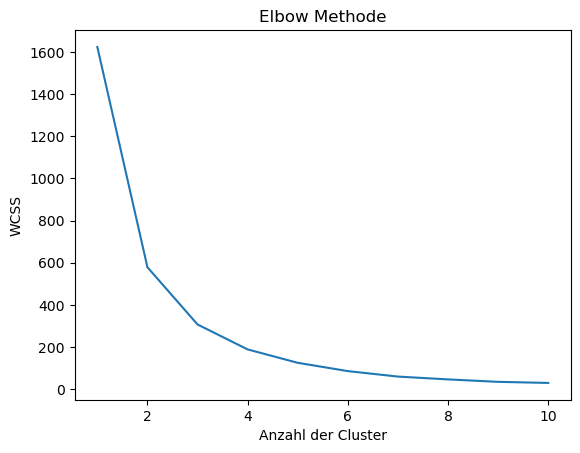

In [314]:
elbow_function(netflix_common_titles, 'Popularity')

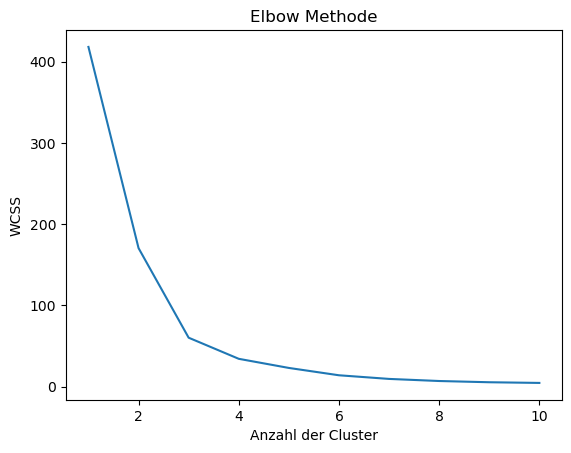

In [315]:
elbow_function(disney_common_titles, 'Popularity')

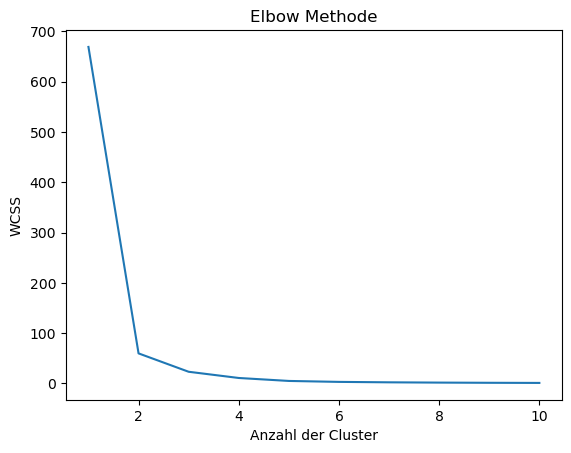

In [316]:
elbow_function(amazon_common_titles, 'Popularity')

## Clustering der gemergeten Datensätze

In [317]:
clustering(netflix_common_titles,3)
clustering(disney_common_titles,3)
clustering(amazon_common_titles,2)

In [318]:
netflix_common_titles.head()

,title,type,cast,release_year,listed_in,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Cluster
0,My Little Pony: A New Generation,Movie,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-01-01,Children & Family Movies,137,190,8.1,en,"Animation, Family, Fantasy, Comedy, Music, Adv...",1
1,The Starling,Movie,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",2021-01-01,"Comedies, Dramas",27,174,7.2,en,Drama,0
2,Confessions of an Invisible Girl,Movie,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",2021-01-01,"Children & Family Movies, Comedies",62,144,7.0,pt,"Comedy, Drama",2
3,Intrusion,Movie,"Freida Pinto, Logan Marshall-Green, Robert Joh...",2021-01-01,Thrillers,60,412,6.1,en,Thriller,2
4,Go! Go! Cory Carson: Chrissy Takes the Wheel,Movie,"Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",2021-01-01,Children & Family Movies,57,18,5.8,en,"Animation, Family",2


In [319]:
netflix_common_titles['Cluster'].unique()

array([1, 0, 2])

# Auswertung der Popularität

## Voting Popularity wird berechnet

In [320]:
def voting_popularity(data,num_cluster):
    cluster_dataframes = {}
    for i in range(0,num_cluster):
        dataframe= data[data['Cluster']==i]
        cluster_dataframes[i]=dataframe
        i=i+1
    for i in range(0,num_cluster):
        normalized = (cluster_dataframes[i]['Popularity']/cluster_dataframes[i]['Popularity'].max())*10
        combined_rating = (normalized + cluster_dataframes[i]['Vote_Average'])/2
        cluster_dataframes[i] = cluster_dataframes[i].assign(Voting_Popularity=combined_rating)
        i= i+1
    combined_dataframe = pd.concat(cluster_dataframes.values(), ignore_index=True)
    combined_dataframe = combined_dataframe.sort_values(by='Voting_Popularity', ascending=False)
    return combined_dataframe

combined_dataframe_netflix = voting_popularity(netflix_common_titles,3)
combined_dataframe_disney = voting_popularity(disney_common_titles,3)
combined_dataframe_amazon = voting_popularity(amazon_common_titles,2)

posx and posy should be finite values
posx and posy should be finite values


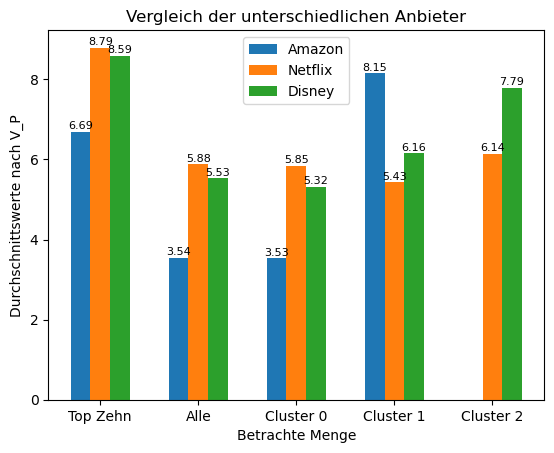

In [321]:
#Data Preperation
top_ten_netflix = combined_dataframe_netflix.head(10)
top_ten_disney = combined_dataframe_disney.head(10)
top_ten_amazon = combined_dataframe_amazon.head(10)

netflix_cluster_0 = combined_dataframe_netflix[combined_dataframe_netflix['Cluster']==0]
netflix_cluster_1 = combined_dataframe_netflix[combined_dataframe_netflix['Cluster']==1]
netflix_cluster_2 = combined_dataframe_netflix[combined_dataframe_netflix['Cluster']==2]

disney_cluster_0 = combined_dataframe_disney[combined_dataframe_disney['Cluster']==0]
disney_cluster_1 = combined_dataframe_disney[combined_dataframe_disney['Cluster']==1]
disney_cluster_2 = combined_dataframe_disney[combined_dataframe_disney['Cluster']==2]

amazon_cluster_0 = combined_dataframe_amazon[combined_dataframe_amazon['Cluster']==0]
amazon_cluster_1 = combined_dataframe_amazon[combined_dataframe_amazon['Cluster']==1]
amazon_cluster_2 = combined_dataframe_amazon[combined_dataframe_amazon['Cluster']==2]


# Example data
labels = ['Top Zehn', 'Alle', 'Cluster 0','Cluster 1', 'Cluster 2']
amazon_values = [top_ten_amazon["Voting_Popularity"].mean(), combined_dataframe_amazon['Voting_Popularity'].mean(), amazon_cluster_0['Voting_Popularity'].mean(), amazon_cluster_1['Voting_Popularity'].mean(), amazon_cluster_2['Voting_Popularity'].mean()]
netflix_values = [top_ten_netflix["Voting_Popularity"].mean(), combined_dataframe_netflix['Voting_Popularity'].mean(), netflix_cluster_0['Voting_Popularity'].mean(), netflix_cluster_1['Voting_Popularity'].mean(), netflix_cluster_2['Voting_Popularity'].mean()]
disney_values = [top_ten_disney["Voting_Popularity"].mean(), combined_dataframe_disney['Voting_Popularity'].mean(), disney_cluster_0['Voting_Popularity'].mean(), disney_cluster_1['Voting_Popularity'].mean(), disney_cluster_2['Voting_Popularity'].mean()]

bar_width = 0.2  # Width of each bar

# Set up the positions for the bars
positions_1 = np.arange(len(labels))
positions_2 = positions_1 + bar_width
positions_3 = positions_1 + 2 * bar_width

# Create the bar chart
plt.bar(positions_1, amazon_values, width=bar_width, label='Amazon')
plt.bar(positions_2, netflix_values, width=bar_width, label='Netflix')
plt.bar(positions_3, disney_values, width=bar_width, label='Disney')

# Add labels and title
plt.xlabel('Betrachte Menge')
plt.ylabel('Durchschnittswerte nach V_P')
plt.title('Vergleich der unterschiedlichen Anbieter')
plt.xticks(positions_1 + bar_width, labels)

for i in range(len(positions_1)):
    plt.text(positions_1[i], amazon_values[i] + 0.02, f'{amazon_values[i]:.2f}', ha='center', va='bottom', color='black', fontsize=8)
    plt.text(positions_2[i], netflix_values[i] + 0.02, f'{netflix_values[i]:.2f}', ha='center', va='bottom', color='black', fontsize=8)
    plt.text(positions_3[i], disney_values[i] + 0.02, f'{disney_values[i]:.2f}', ha='center', va='bottom', color='black', fontsize=8)

# Add legend
plt.legend()

# Show the plot
plt.show()

## Voting Popularity pro Genre bei den einzelnen Streaming Anbietern

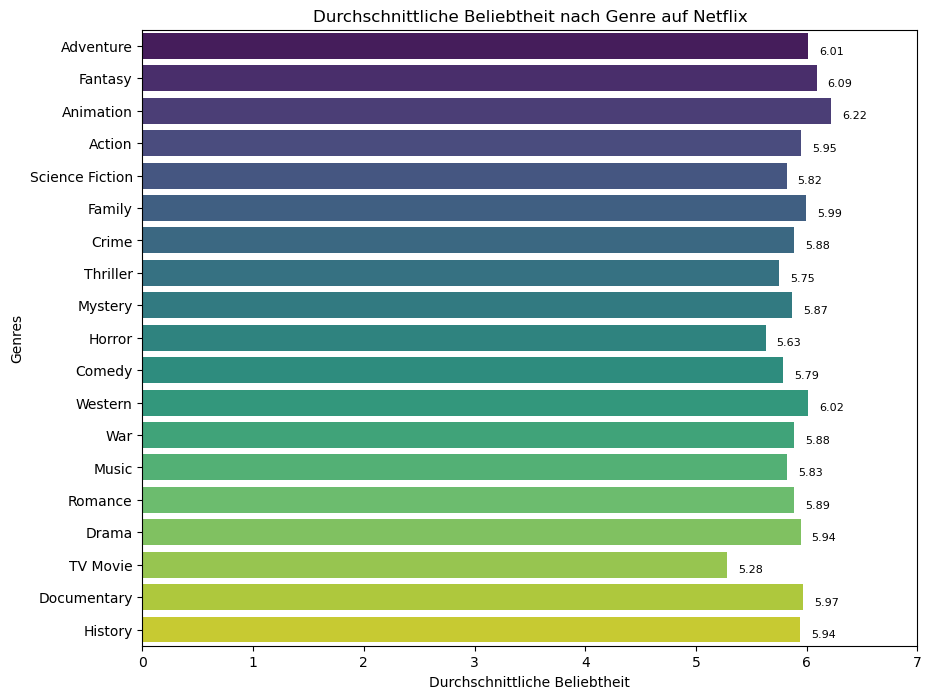

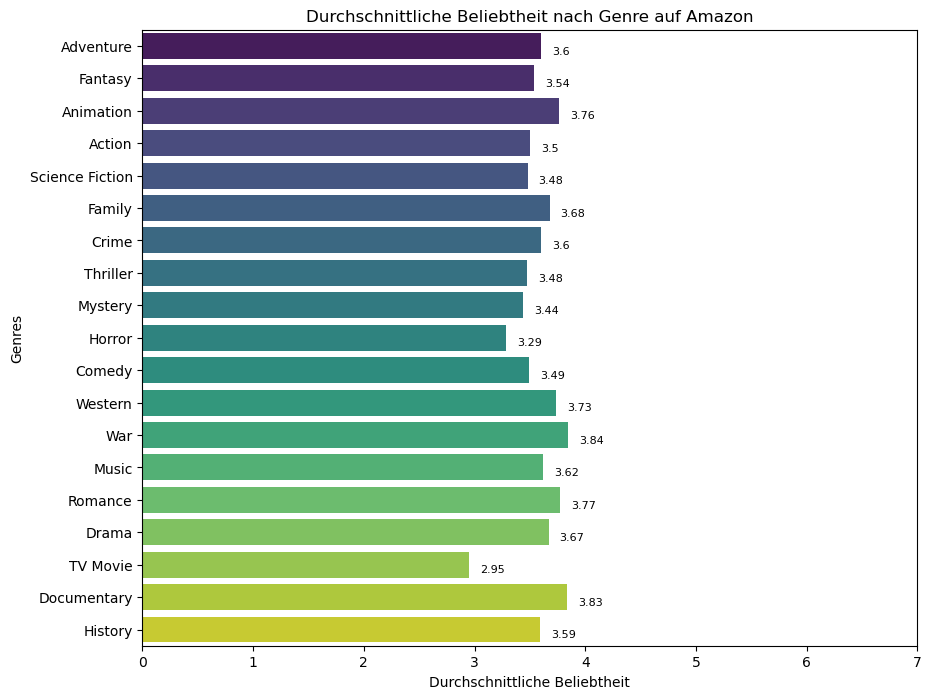

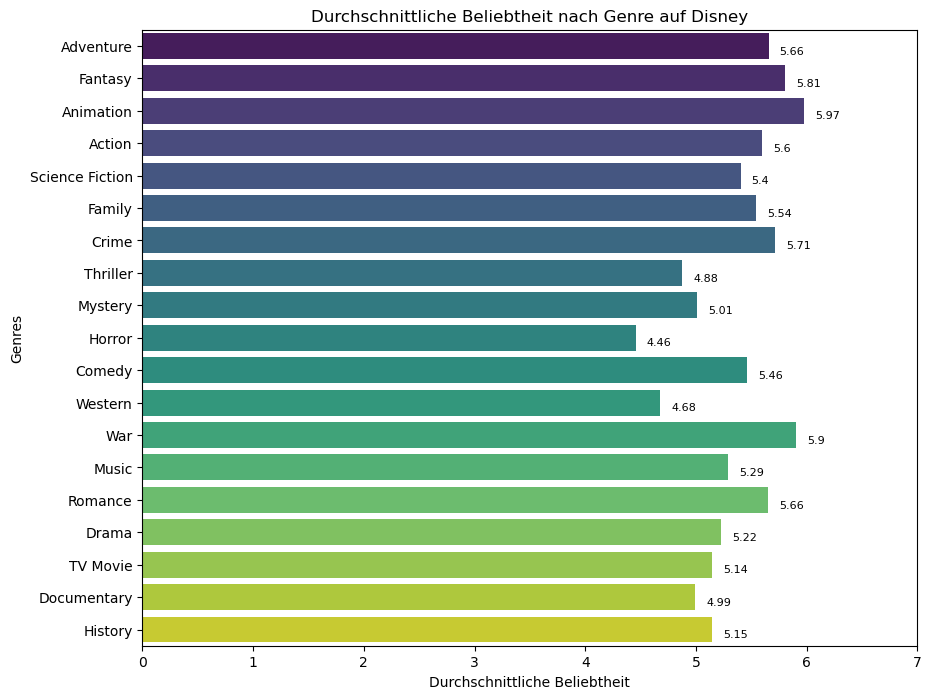

In [322]:
def chart_genre(data,name):
    genres = ['Adventure', 'Fantasy', 'Animation', 'Action', 'Science Fiction', 'Family', 'Crime', 'Thriller', 'Mystery',
          'Horror', 'Comedy', 'Western', 'War', 'Music', 'Romance', 'Drama', 'TV Movie', 'Documentary', 'History']

    values = []

    for genre in genres:
        genre_mean = data.loc[data['Genre'].str.contains(genre), 'Voting_Popularity'].mean()
        values.append(genre_mean)
    
    # Bar-Chart
    plt.figure(figsize=(10, 8))
    barplot = sns.barplot(x=values, y=genres, palette='viridis')  # Assign the sns.barplot() function to a variable
    plt.xlabel('Durchschnittliche Beliebtheit')
    plt.ylabel('Genres')
    plt.title('Durchschnittliche Beliebtheit nach Genre auf ' + name)
    plt.xlim(0, 7)  # Set the limits of x-axis

    # Add the values on the bars
    for i, v in enumerate(values):
        barplot.text(v + 0.1, i + .25, str(round(v, 2)), color='black', fontsize = 8)

    plt.show()

chart_genre(combined_dataframe_netflix,'Netflix')
chart_genre(combined_dataframe_amazon,'Amazon')
chart_genre(combined_dataframe_disney,'Disney')

## Bester Anbieter pro Genre

In [324]:
def best_provider_per_genre(dataframes, names):
    genres = ['Adventure', 'Fantasy', 'Animation', 'Action', 'Science Fiction', 'Family', 'Crime', 'Thriller', 'Mystery',
          'Horror', 'Comedy', 'Western', 'War', 'Music', 'Romance', 'Drama', 'TV Movie', 'Documentary', 'History']

    best_providers = []
    best_values = []

    for genre in genres:
        genre_means = []
        for df, name in zip(dataframes, names):
            genre_mean = df.loc[df['Genre'].str.contains(genre), 'Voting_Popularity'].mean()
            genre_means.append(genre_mean)
        
        best_provider_index = genre_means.index(max(genre_means))
        best_providers.append(names[best_provider_index])
        best_values.append(max(genre_means))

    # Create a DataFrame for the best provider per genre
    df_best_providers = pd.DataFrame({'Genre': genres, 'Bester Anbieter': best_providers, 'Durchschnittliche Bewertung': best_values})

    # Sort the DataFrame by 'Average Voting Popularity' in descending order
    df_best_providers = df_best_providers.sort_values(by='Durchschnittliche Bewertung', ascending=False)

    # Display the DataFrame
    print(df_best_providers)

# Call the function with the dataframes and their corresponding names
best_provider_per_genre([combined_dataframe_netflix, combined_dataframe_amazon, combined_dataframe_disney], ['Netflix', 'Amazon', 'Disney'])

              Genre Bester Anbieter  Durchschnittliche Bewertung
2         Animation         Netflix                     6.221691
1           Fantasy         Netflix                     6.089288
11          Western         Netflix                     6.015214
0         Adventure         Netflix                     6.010878
5            Family         Netflix                     5.994702
17      Documentary         Netflix                     5.970563
3            Action         Netflix                     5.945510
15            Drama         Netflix                     5.944972
18          History         Netflix                     5.940308
12              War          Disney                     5.904412
14          Romance         Netflix                     5.887516
6             Crime         Netflix                     5.884825
8           Mystery         Netflix                     5.868364
13            Music         Netflix                     5.825627
4   Science Fiction      